In [1]:
# load necessary libraries
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

from xgboost import XGBRegressor

In [2]:
from sklearn import datasets
boston = datasets.load_boston()

In [3]:
# Creating dataframe
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
df["MedV"] = boston["target"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MedV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Spliting target variable and independent variables
X = df.drop(['MedV'], axis = 1)
y = df['MedV']

In [5]:
# Splitting data for test and train
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

### Multiple Linear Regression

In [6]:
# importing library for Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
# Fitting model into the training dat
model.fit(x_train,y_train)

LinearRegression()

In [10]:
# Creating a dataframe for regression coefficients
coefficients = pd.DataFrame([x_train.columns,model.coef_]).T
coefficients = coefficients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coefficients

,Attribute,Coefficients
0,CRIM,-0.12257
1,ZN,0.0556777
2,INDUS,-0.00883428
3,CHAS,4.69345
4,NOX,-14.4358
5,RM,3.28008
6,AGE,-0.00344778
7,DIS,-1.55214
8,RAD,0.32625
9,TAX,-0.0140666


In [16]:
# Model prediction on train data
y_pred = model.predict(x_train)
y_pred

array([24.52247959, 15.19750953, 25.5772058 , 13.93939959, 39.46651291,
       17.45959949, 39.71029914, 16.51748069, 20.19733317, 40.7977555 ,
       33.57245034, 14.50420619, 11.44514488, 23.06563951, 24.39734404,
       25.01096096, 14.36116466, 28.28341539, 25.04931481, 22.42825155,
       21.81588517, 18.85208726, 13.3562124 , 13.65792701, 23.64766018,
       18.06876331, 16.12957228, 41.12414874, 19.43391814, 13.17980896,
       12.88401778, 24.48360463, 24.47855835, 22.1443201 , 23.67882714,
       16.25760322, 18.73996794,  6.65661308, 13.32321855, 15.97333187,
       18.13637439, 20.60454402, 30.72884443,  7.75848746, 13.9207036 ,
       -3.80684116, 30.22337446,  9.24045737, 11.75825936, 25.0286616 ,
       18.84078418, 11.88476435, 28.69569373, 23.23374551, 28.59506092,
       20.30414612, 20.27099511, 25.21759304, 29.00813278, 17.29931495,
       10.61483731, 28.61476335, 28.34559327, 30.02547802, 17.11529423,
       20.57024793, 18.28474144, 13.03972891, 23.08527124, 22.90

In [18]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.08986109497113
MSE: 19.07368870346903
RMSE: 4.367343437774162


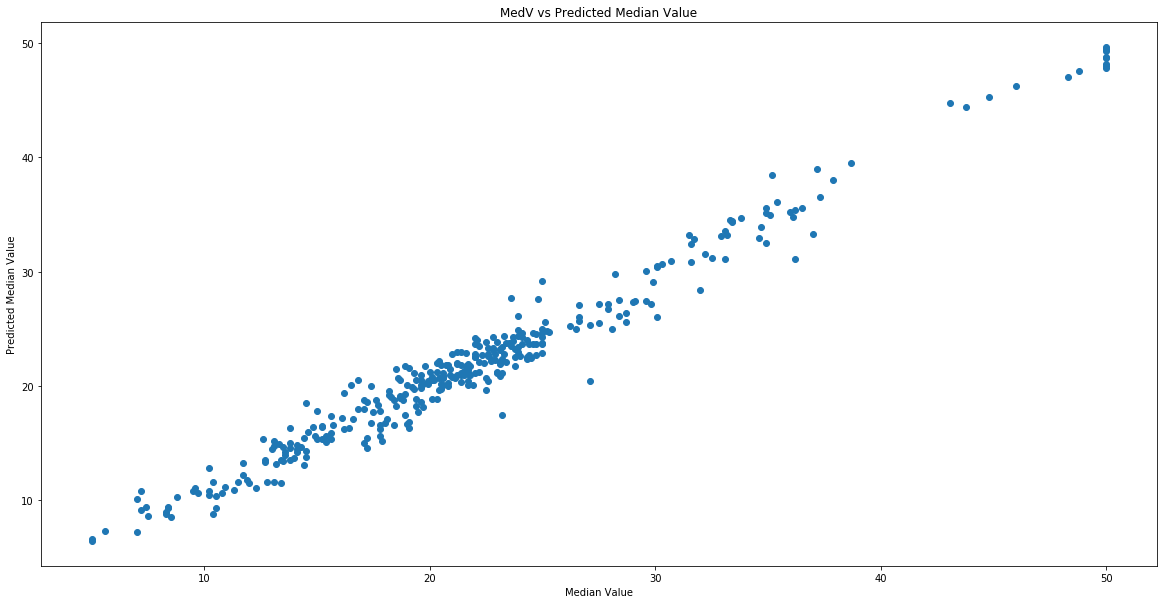

In [65]:
plt.figure(figsize=(20, 10))
plt.scatter(y_train, y_pred)
plt.xlabel("Median Value")
plt.ylabel("Predicted Median Value")
plt.title("MedV vs Predicted Median Value")

plt.savefig('Median Value vs Predicted Median Value.png')
plt.show()

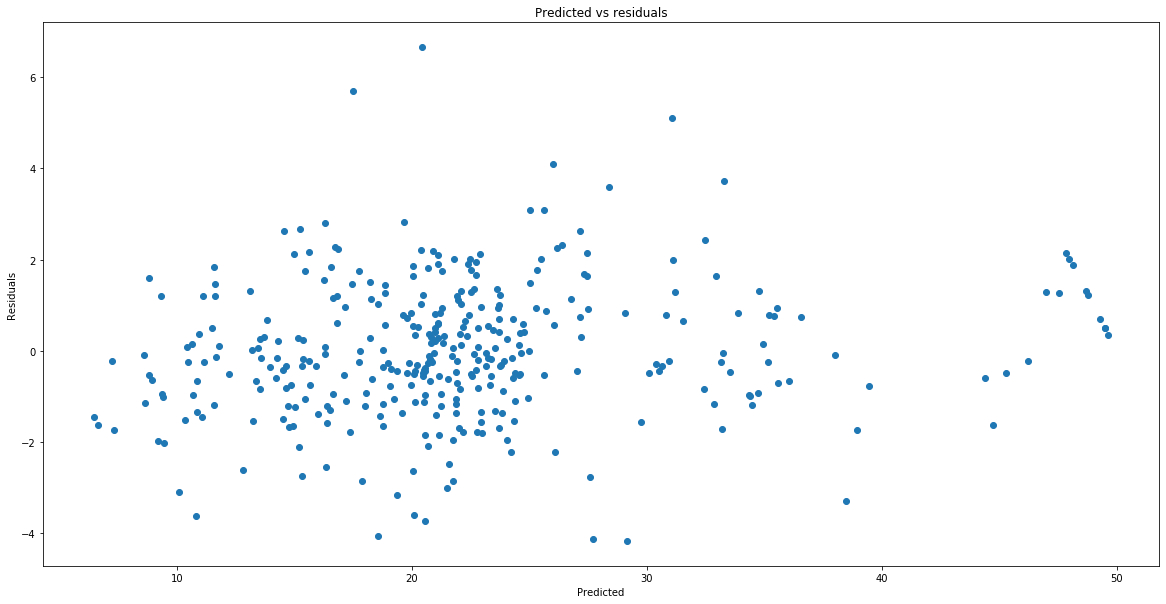

In [66]:
# Checking residuals
plt.figure(figsize=(20, 10))
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.savefig('Predicted vs residuals.png')
plt.show()

In [21]:
# Predicting Test data with the model
y_test_pred = model.predict(x_test)

In [23]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7121818377409195
Adjusted R^2: 0.6850685326005713
MAE: 3.8590055923707407
MSE: 30.053993307124127
RMSE: 5.482152251362974


### Decision Tree Regressor

In [42]:
tree = DecisionTreeRegressor()
tree = tree.fit(x_train,y_train)

In [43]:
y_pred = tree.predict(x_train)
y_pred

array([23.9, 18.2, 21.7, 13.5, 50. , 23.1, 48.8, 13.8, 20.1, 50. , 34.9,
        8.4, 15.2, 23. , 24.7, 25.3, 17.2, 50. , 22.9, 20.2, 17.4, 19.5,
       18.5, 14. , 22.6, 14.1, 15.6, 46. , 20.5, 13.5, 10.4, 21.4, 21.6,
       23.2, 23. , 17.6, 16.1,  5. ,  8.3, 27.5, 18.7, 21.7, 30.7,  5. ,
       11.3,  7. , 32.9, 14.6, 12. , 28.1, 18. ,  5.6, 23.6, 24.7, 22.5,
       17.7, 13.1, 23.1, 25. , 14.9,  9.7, 22.8, 22. , 23.6, 14.3, 18.8,
       19.9, 13.6, 19.4, 16.8, 20. , 43.1, 27.9, 20.1, 19. , 19.2, 21.7,
       33.1, 50. , 33.2, 20.1, 21.1,  8.8, 12.3, 14.5, 23.8, 18.7, 21.8,
       21.9, 21.7, 17.1, 23.1, 36.1, 28.2, 11.5, 19. , 22. , 10.5, 21.4,
       16.5, 20.6, 23.3, 23.5, 15. , 26.5, 50. , 10.5, 17.5, 13.6, 17.2,
       19.1, 16.4, 20.6, 20.9, 30.1, 20.7, 22.2, 24.6, 25.2, 37.9, 20.1,
       29.6, 18.7, 23. , 22.9, 24.6, 24.8, 20.8, 22.4, 18.2, 14.4, 23.2,
       13. , 19.7, 21.2, 21.7, 24. , 22. , 20.6, 11.9, 24.3, 23.8, 22.8,
       13.3, 25. , 21. , 20.4, 33.1, 48.3, 14.5, 36

In [44]:
# Model Evaluation
acc_dtr_train = metrics.r2_score(y_train, y_pred)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 1.0
Adjusted R^2: 1.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0


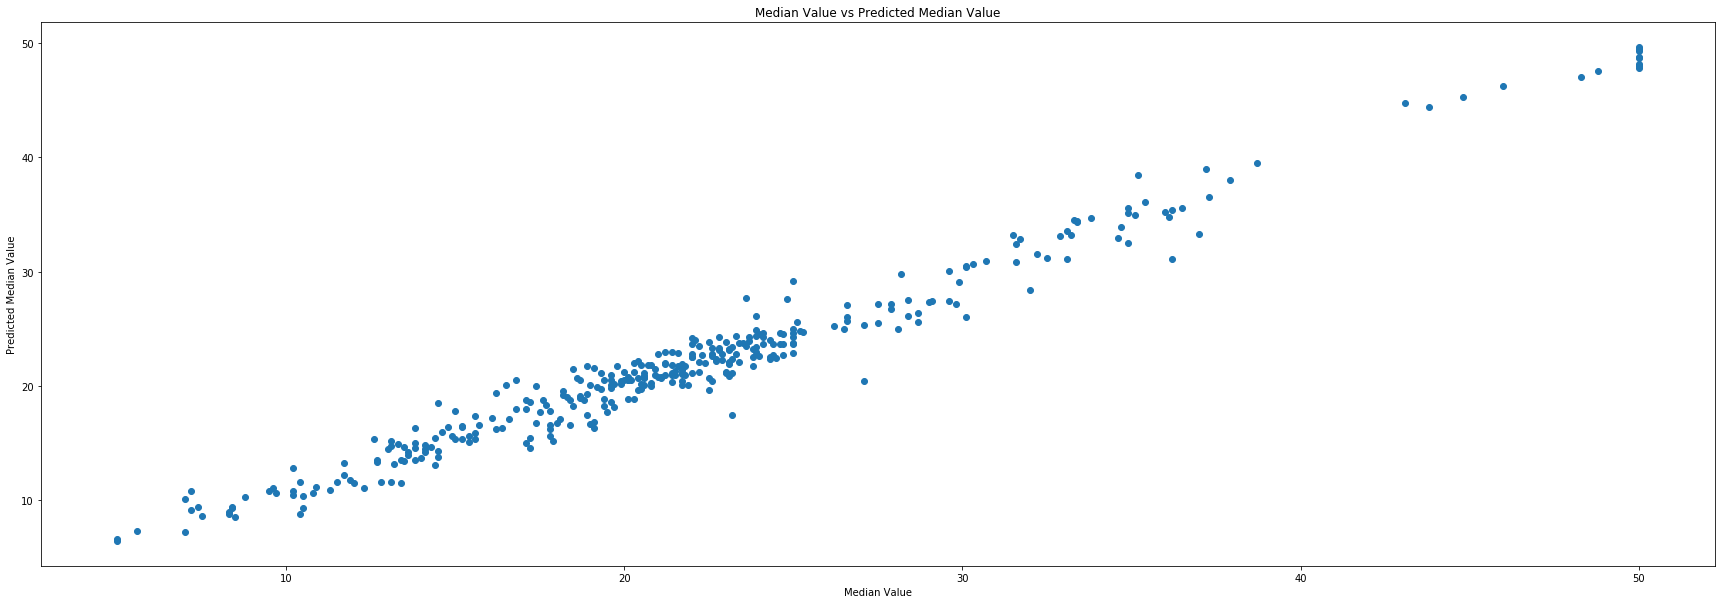

In [67]:
plt.figure(figsize=(20, 10))
plt.scatter(y_train, y_pred)
plt.xlabel("Median Value")
plt.ylabel("Predicted Median Value")
plt.title("Median Value vs Predicted Median Value")
plt.savefig('Median Value vs Predicted Median Value_DTR.png')
plt.show()

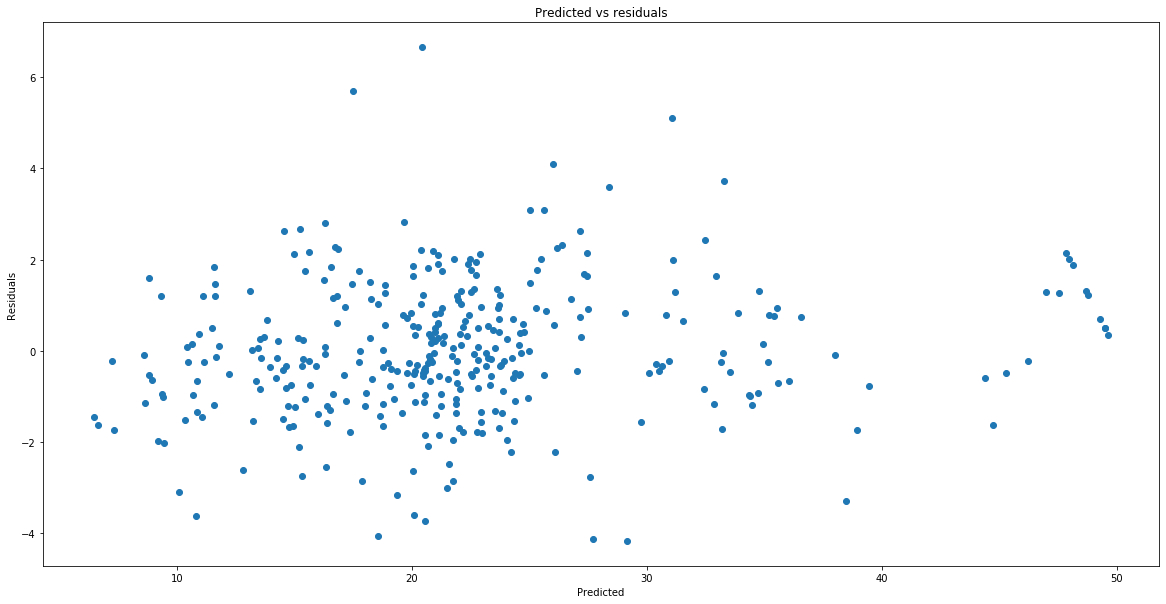

In [68]:
plt.figure(figsize=(20, 10))
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.savefig('Predicted vs residuals_DTR.png')
plt.show()

In [49]:
# Model Evaluation
acc_dtr = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_dtr)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8494894736313225
Adjusted R^2: 0.8353109457849979
MAE: 2.4509708843733136
MSE: 15.716320042597493
RMSE: 3.9643814199188117


### XGBRegressor

In [50]:
#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(x_train, y_train)

[14:54:00] WARNING: /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [51]:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

XGBRegressor(silent=True)

In [52]:
y_pred = reg.predict(x_train)

In [53]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9703652512761263
Adjusted R^2: 0.9692321579425663
MAE: 1.1372202838208043
MSE: 2.230632123289034
RMSE: 1.4935300878419002


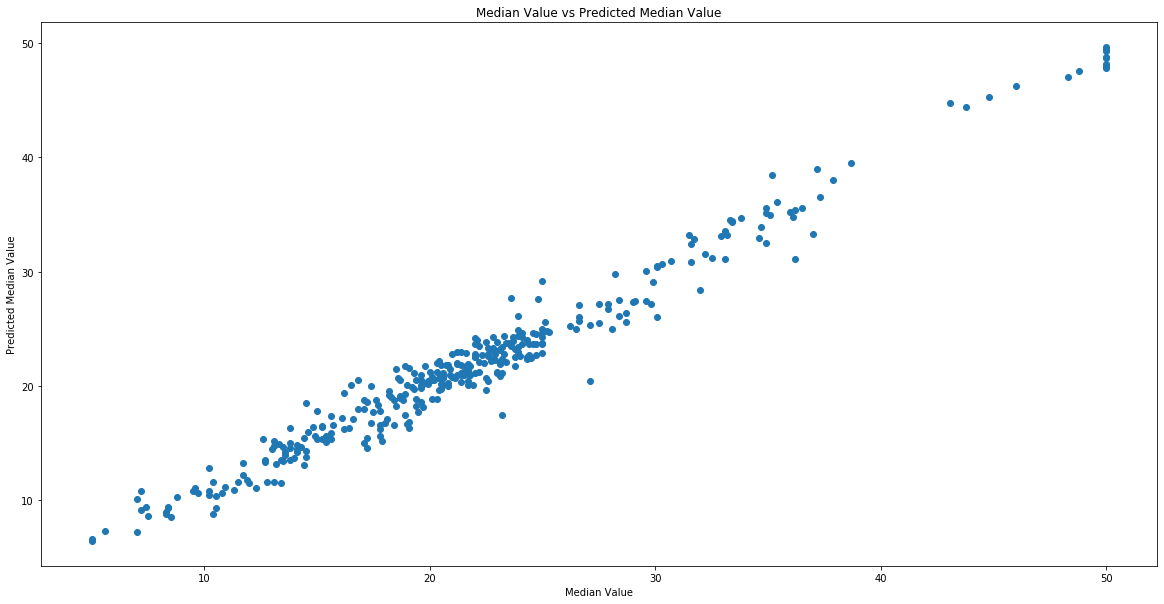

In [69]:
# Visualizing the differences between actual prices and predicted values
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.scatter(y_train, y_pred)
plt.xlabel("Median Value")
plt.ylabel("Predicted Median Value")
plt.title("Median Value vs Predicted Median Value")
plt.savefig('Median Value vs Predicted Median Value_XGB.png')
plt.show()

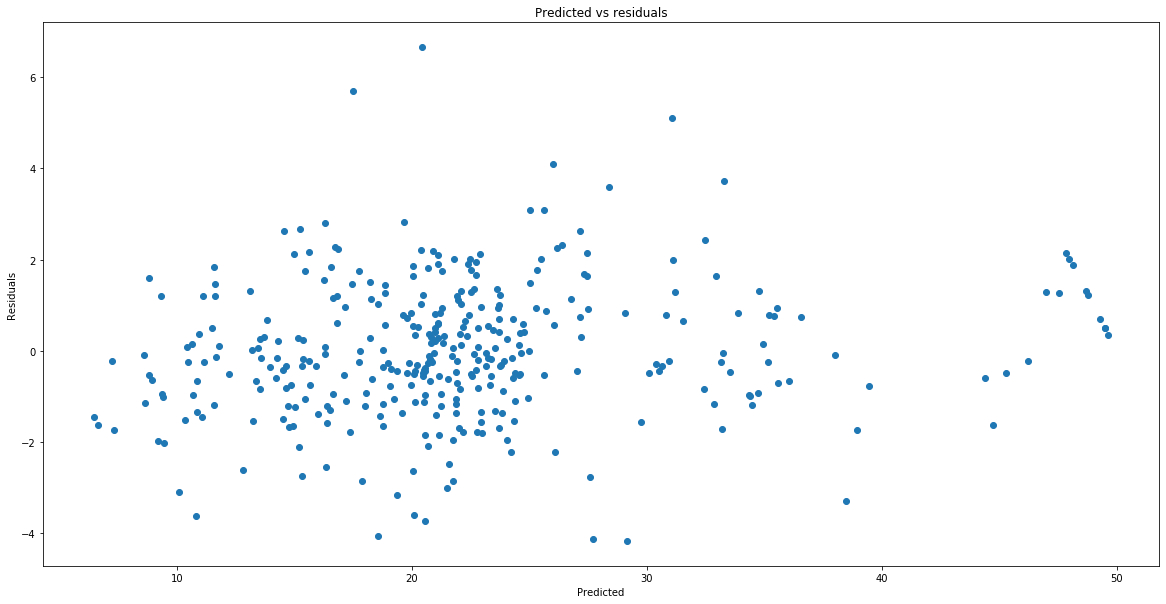

In [70]:
# Checking residuals
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.savefig('Predicted vs residuals_XGB.png')
plt.show()

In [56]:
#Predicting Test data with the model
y_test_pred = reg.predict(x_test)

In [57]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8494894736313225
Adjusted R^2: 0.8353109457849979
MAE: 2.4509708843733136
MSE: 15.716320042597493
RMSE: 3.9643814199188117


In [59]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'XGBoost'],
    'R-squared Score': [acc_linreg*100, acc_dtr*100, acc_xgb*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Decision Tree Regressor,84.948947
2,XGBoost,84.948947
0,Linear Regression,71.218184
